# Impurity Model for nEXO

This Jupyter notebook was made so simply and easily plot the expected outgassing rate of a piece of material in a given system. 

We start off by importing a few necessary packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

Next we are goint to load the 3 pieces of code that contain all the information for this model. The first one is 'Library.py' which contains the parameters of various setups as well as materials to be used in that given setup. Before running this notebook you want to make sure that your combination of setup and material is entered correctly.

In [2]:
import Library as Lib 
import Outgassing as Out
from RunModel import * 

In [3]:
S1 = System(Setup='YLXPS', Material='Teflon', Solute='Oxygen', Version='EXO-Teflon')

You can check the values for each system by executing

In [4]:
S1.Print() 

Name: YLXPS
 Material: Teflon
 Solute: Oxygen
 Version: EXO-Teflon
 Diffusion: 1.256e-06
 Solubility: 0.22
 ActivationEnergy: 0.17
 Abundance: 0.21
 MolarMass: 32
 XeMass: 2170
 Volume: 0.0053
 Area: 390.32180000000005
 Thickness: 0.15


Define the different temperatures for which to calculate outgassing

In [5]:
Temperature = [295, 295]
S1.Temp = Temperature  

Calculate the diffusion constants for the above defined temperatures using the Arrhenius equation

In [6]:
S1.DiffConstants = Out.GetDiffTemp(S1, Temperatures=S1.Temp)    

Get the initial number of impurities from model parameters. Can define '#', 'ppm,ppb,ppt' or 'Mass' for units 

In [7]:
S1.InitialImpurities = Out.GetInitialImpurities(S1, '#')

Forward above defined labels, that will be later used for the plot legend.

In [8]:
S1.Labels = 'EXO-200 Teflon'

Sets time regions for the above defined temperature values

In [9]:
S1.Time = GetTimeStamps(Points=[0,100,200], Spacing=0.1, TimeScale='Hours')

Calculate the number of impurities left in the sample vs time by using the solution to the diffusion equation.

In [10]:
S1.Impurities = Out.GetImpuritiesVsTime(Data=S1, TimeScale='Hours')

Calculate the outgassing rate vs time using Fick's 1st law 

In [11]:
S1.FlowRate = Out.GetFlowRateVsTime(Data=S1, Units='mBar Liter', TimeScale='Hours')

Now one can easily plot the number of impurities left in the material and the outgassing rate expected from that material 

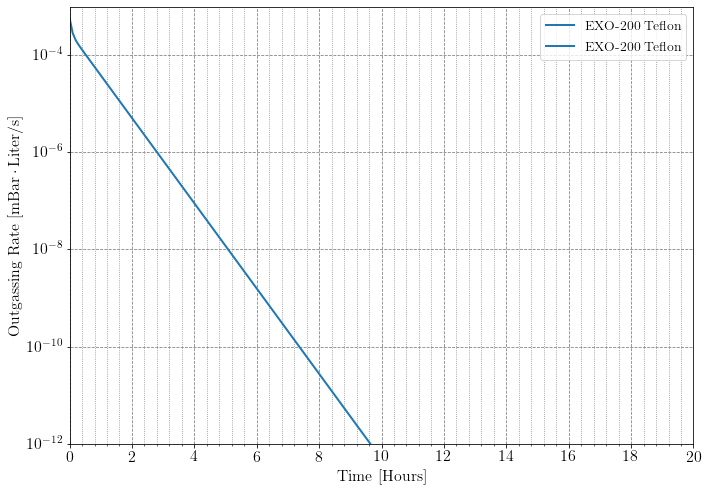

In [12]:
# PlotImpuritiesVsTime([S1])
PlotFlowRateVsTime([S1], XRange=[0,20], XTicks=2)

ValueError: array is too big; `arr.size * arr.dtype.itemsize` is larger than the maximum possible size.

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x2ab09f1b2dd0> (for post_execute):


ValueError: array is too big; `arr.size * arr.dtype.itemsize` is larger than the maximum possible size.

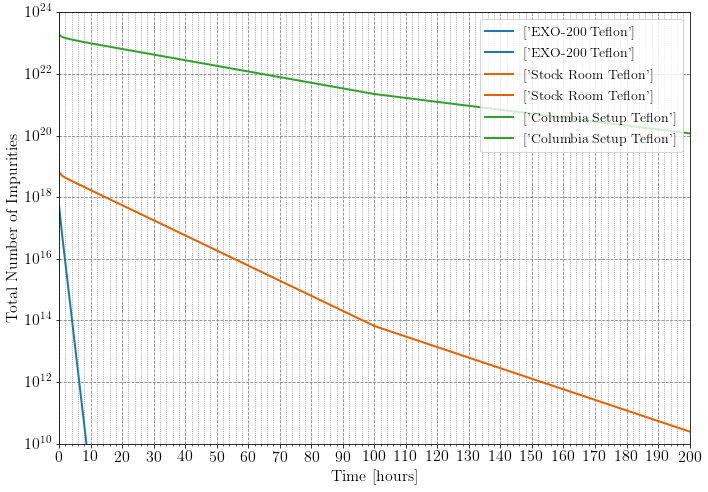

ValueError: array is too big; `arr.size * arr.dtype.itemsize` is larger than the maximum possible size.

In [13]:
S1 = System(Setup='YLXPS', Material='Teflon', Solute='Oxygen', Version='EXO-Teflon')
S2 = System(Setup='YLXPS', Material='Teflon', Solute='Oxygen', Version='Stock-Teflon')
S3 = System(Setup='YLXPS', Material='Teflon', Solute='Oxygen', Version='Columbia-Teflon')

Systems = [S1,S2,S3]
Labels = [['EXO-200 Teflon'], ['Stock Room Teflon'], ['Columbia Setup Teflon']]
Temperature = [295, 280]
Time = GetTimeStamps(Points=[0,100,200], Spacing=1, TimeScale='Hours')
DoModelling(Systems, Labels, Temperature, Time)

PlotImpuritiesVsTime(Systems)
PlotFlowRateVsTime(Systems,YRange=[1E-20,1E20])